# Happiness Score Use Data

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Load the dataset

In [2]:
hdf = pd.read_csv('happiness_score_dataset.csv')

In [3]:
hdf.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
47,Ecuador,Latin America and Caribbean,48,5.975,0.04528,0.86402,0.99903,0.79075,0.48574,0.18090,0.11541,2.53942
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
142,Gabon,Sub-Saharan Africa,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017
11,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
135,Yemen,Middle East and Northern Africa,136,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313
57,Peru,Latin America and Caribbean,58,5.824,0.04615,0.90019,0.97459,0.73017,0.41496,0.05989,0.14982,2.59450
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
29,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


The World Happiness Report calculates happiness score of different countries of the world and accordingly ranks them. Ths report was first published in 2012 & has been gaining popularity since then across the globe. The data used for calculating this scores are from Gallop World Poll which uses Cantril Ladder approch for gaining this data. With Cantril Ladder the respondent are asked life evaluaton question in a poll & are asked to scale their lives between 0 to 10 where 0 is the worst possible place to live & 10 being the highest or the best possible place. 

The following columns: Economy (GDP per Capita), Family, Health(Life Expectancy), Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The standard error in the dataset represents the standard error of the happiness score which speaking statistically is the standard deviation of Happiness Score.

Dystopia is an imaginary country which has the least happy people. This has been established to set a benchmark for all the other countries to be favorable compared to. The lowest scores observed for he six key variables charterize Dystopia. 
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.



In [4]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
hdf.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observaions:

* Happiness Score mean is 5.37 approx with standard deviation of 1.14. Min value is 2.83 & Max value is 7.58 is normally distributed.

* All the six variables ie Economy (GDP per Capita),Family, Health(Life Expectancy), Freedom, Trust(Government Corruption) & Generosity all have min values at 0 & Max values as 1.69, 1.40, 1.02,0.67,0.55 & 0.80.

* Dystopia Residual's mean is 2.10 & standard deviation is 0.55. Where min is 0.33 & max is 3.06


# Lets study the relation of Economy,Family,Health,Freedom,Trust & Generoisity on Happiness Score Regionwise

<function matplotlib.pyplot.show(*args, **kw)>

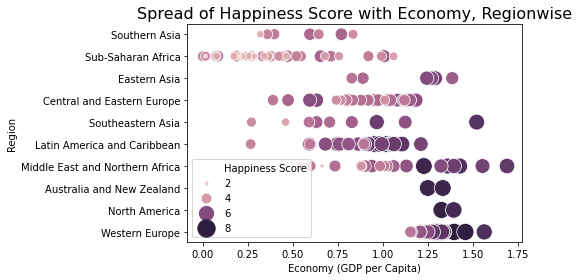

In [6]:
sns.scatterplot(x="Economy (GDP per Capita)", y="Region", hue = 'Happiness Score',size = "Happiness Score",sizes = (10,300),legend = 'brief', data=hdf )
plt.title('Spread of Happiness Score with Economy, Regionwise', fontsize = 16)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

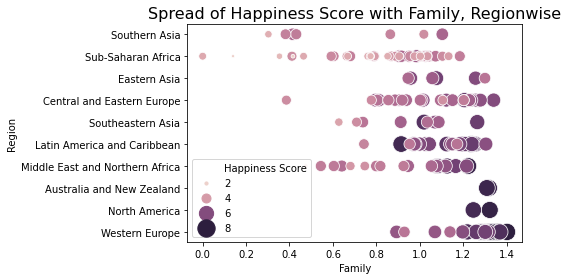

In [7]:
sns.scatterplot(x="Family", y="Region", hue = 'Happiness Score',size = "Happiness Score",sizes = (10,300),legend = 'brief',data=hdf )
plt.title('Spread of Happiness Score with Family, Regionwise', fontsize = 16)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

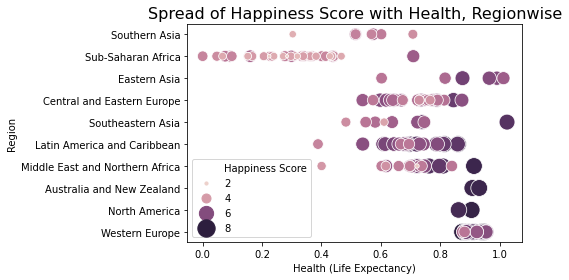

In [8]:
sns.scatterplot(x="Health (Life Expectancy)", y="Region", hue = 'Happiness Score',size = "Happiness Score",sizes = (10,300),legend = 'brief', data=hdf )
plt.title('Spread of Happiness Score with Health, Regionwise', fontsize = 16)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

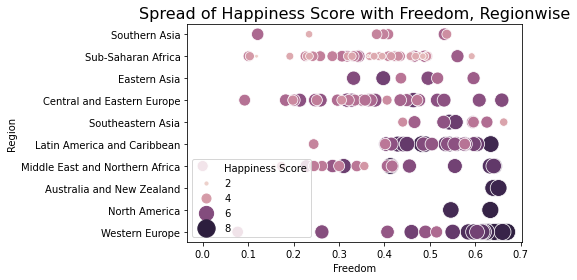

In [9]:
sns.scatterplot(x="Freedom", y="Region", hue = 'Happiness Score',size = "Happiness Score",sizes = (10,300),legend = 'brief', data=hdf )
plt.title('Spread of Happiness Score with Freedom, Regionwise', fontsize = 16)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

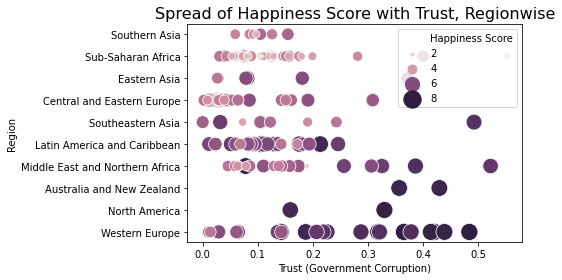

In [10]:
sns.scatterplot(x="Trust (Government Corruption)", y="Region", hue = 'Happiness Score',size = "Happiness Score",sizes = (10,300),legend = 'brief', data=hdf )
plt.title('Spread of Happiness Score with Trust, Regionwise', fontsize = 16)
plt.show

Majority of Western European Countries, North America, Australia & New Zealand Regions have Freedom to Happiness Score.

<function matplotlib.pyplot.show(*args, **kw)>

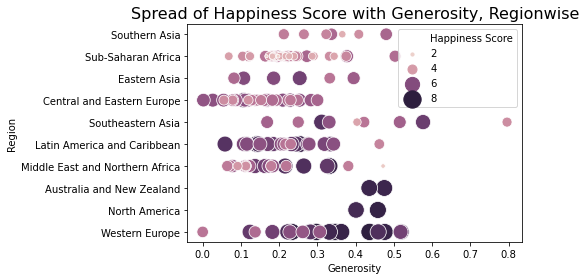

In [11]:
sns.scatterplot(x="Generosity", y="Region", hue = 'Happiness Score',size = "Happiness Score",sizes = (10,300),legend = 'brief', color = 'blue', data=hdf )
plt.title('Spread of Happiness Score with Generosity, Regionwise', fontsize = 16)
plt.show

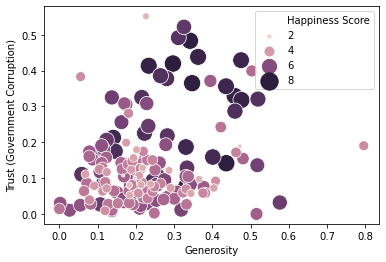

In [12]:
sns.scatterplot(x="Generosity", y="Trust (Government Corruption)", hue = 'Happiness Score',size = "Happiness Score",sizes = (10,300),legend = 'brief', color = 'blue', data=hdf )

Observation from the Scatter Plots
> * The region where Happiness Score & Freeedom are highly correlated are Western Europe, North America, Australia & NewZealand, some Middle Easte & North African Region and few countries falling in Latin America & Carribean Region. Central & Eastern Europe, Eastern Asian Region , Southern Asia, falls under moderate category whereas Sub-Saharan Africa & just maybe one country in Southern Asia falls under lowest category.
 * Economy (GDP per Capita) is higher in Australia & New Zealand, North America & Western Europe. Also we see Latin America & Caribbean have higher economy rate & Middle East & North Africa falls in moderate economy rate. Sub-Saharan African countries & few Southern & southeast Ashian countries have very low Economy resulting in lesser happiness score.
 * This plot clearly points country that has least Health(Life Expctancy) values in Sub-Saharan Africa & few of Southern Asia & SOuthEast Asian countries. Whereas Australia,New Zealand & North America have the highest rate. 
 * 

# Checking of Data Correlation, Skewness & Outliers

Before moving to the next step of checking skewness & outliers of the data lets remove the unique data's from the dataset like Country & Happiness Rank. removing Standard Error from the data too & converting the Region column to float-type

In [13]:
hdf_1=hdf

In [14]:
hdf_1.drop(columns = ['Country','Standard Error','Happiness Rank'], inplace = True)
hdf_1

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
hdf_1.iloc[:,0]

0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object

In [17]:
hdf_1.iloc[:,0]=le.fit_transform(hdf_1.iloc[:,0])
hdf_1.iloc[:,0]

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Name: Region, Length: 158, dtype: int32

In [18]:
hdf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    int32  
 1   Happiness Score                158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 10.6 KB


In [19]:
hdf_1.describe()

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [20]:
hdf_1.isnull().sum()

Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no object variables & no null values in the dataset.

In [21]:
df_corr=hdf_1.corr()
df_corr

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.176791,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,-0.176791,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy (GDP per Capita),-0.260139,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.057276,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


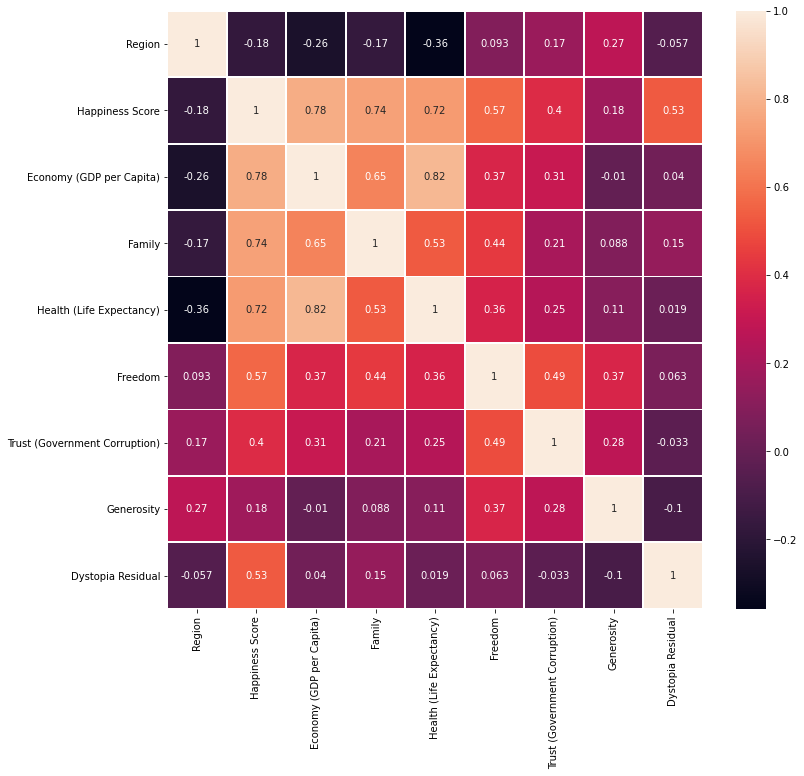

In [22]:
plt.figure(figsize =(12,11))
sns.heatmap(df_corr,annot=True, linewidths = .8,)
plt.show()




Observations from the above heatmap
>* There is high correlation between Happiness Score & Economy(GDP per Capita), Family, Health(Life Expectancy).
 * Freedom is moderately correlated.
 * Trust & Generosity has good correlation.
 * Health (Life Expectancy)is highly correlated with Economy
 * We can also observe Economy is highly correlated with Family & Family has good correlation with Health.
 

Lets visualize the data first with distplot

In [23]:
columns = hdf_1.columns
columns

Index(['Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

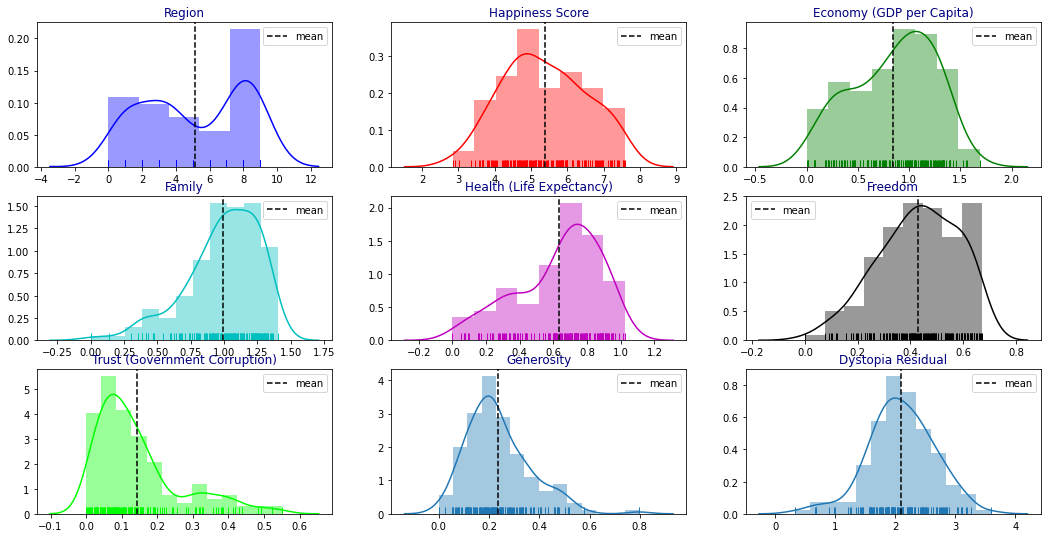

In [24]:
import itertools
cols  = (columns)
length = len(cols)
fig = plt.figure(figsize = (18,25))
cs=['b','r','g','c','m','k','lime']

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,3,j+1)
    ax = sns.distplot(hdf_1[i],color = k,rug = True)
    ax.set_facecolor('w')
    plt.axvline(hdf[i].mean(),linestyle = 'dashed',label='mean',color='k')
    plt.legend(loc='best')
    plt.title(i,color='navy')
    plt.xlabel("")

In [25]:
hdf_1.skew()

Region                          -0.116119
Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

There are skewness in the data & the same will be treated using either power transfomer or np.log as there is negative skewness which will give error in boxcox.

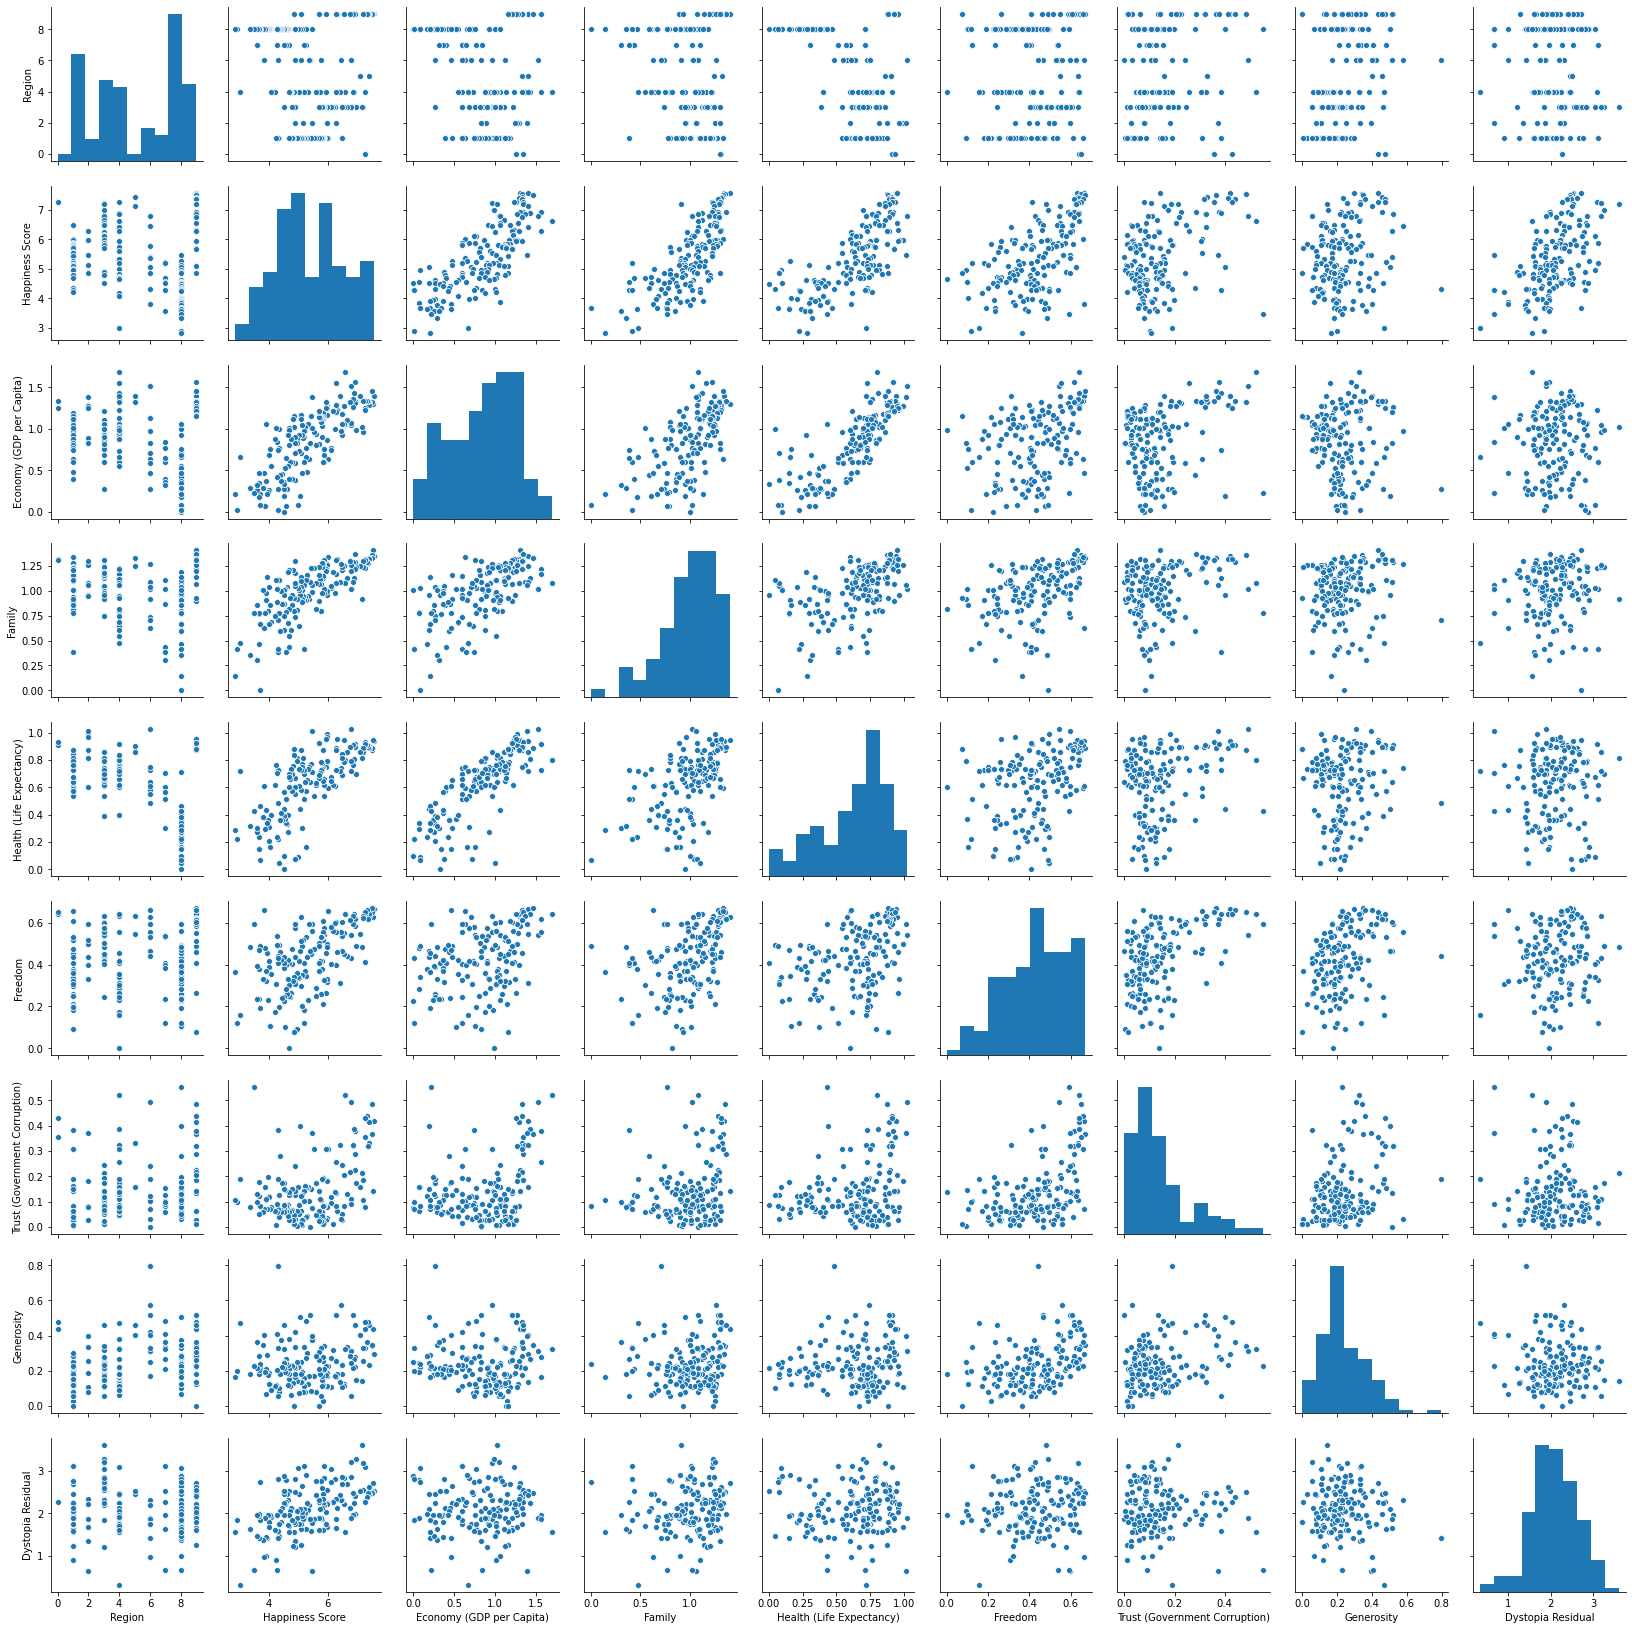

In [26]:
sns.pairplot(data = hdf_1)

* THere is a strong positive visual relation between Happiness Score & Economy(GDP per Capita), Family,Health (LifeExpectancy) & Freedom .
* With Trust(Government Corruption) & Generosity its a scattered relation.
* Economy(GDP per Capita), Family & Health ahve a strong positive relation with each other.

Region                              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Happiness Score                  AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Family                              AxesSubplot(0.125,0.391471;0.227941x0.222059)
Health (Life Expectancy)         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Freedom                          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.227941x0.222059)
Generosity                          AxesSubplot(0.398529,0.125;0.227941x0.222059)
Dystopia Residual                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

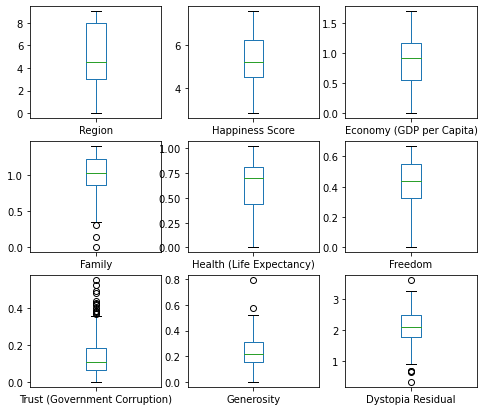

In [27]:
hdf_1.plot(kind='box',subplots=True,figsize = (8,7),layout=(3,3))

We can see outliers in family,trust, generosity & dystopiaresidual. Lets check their scores now

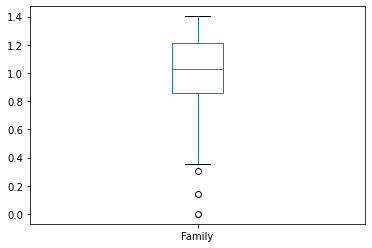

In [28]:
hdf_1['Family'].plot.box()

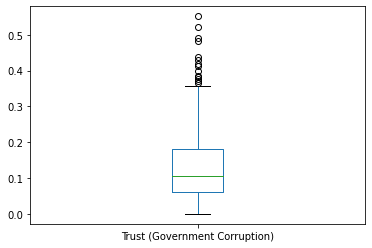

In [29]:
hdf_1['Trust (Government Corruption)'].plot.box()

In [30]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(hdf_1))
threshold = 3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([6, 7, 3, 6, 8, 3], dtype=int64))


In [31]:
hdf_new=hdf_1[(z<3).all(axis=1)]
hdf_new

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,8,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [32]:
hdf_1.shape

(158, 9)

In [33]:
Q1 = hdf_1.quantile(0.25)
Q3 = hdf_1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Region                           5.000000
Happiness Score                  1.717750
Economy (GDP per Capita)         0.612640
Family                           0.357582
Health (Life Expectancy)         0.371828
Freedom                          0.220762
Trust (Government Corruption)    0.118580
Generosity                       0.159330
Dystopia Residual                0.703005
dtype: float64


In [34]:
hdf_iqr=hdf_1[~((hdf_1 < (Q1 - 1.5 * IQR)) | (hdf_1 > (Q3 - 1.5 * IQR))).any(axis=1)]
hdf_iqr.shape

(0, 9)

In [35]:
hdf_new.shape

(152, 9)

In [36]:
## Percentge loss of data using zscore
percentage_loss = ((158-152)/158)*100
print(percentage_loss)

3.79746835443038


For outliers we have seen that zscore is best method as with IQR the whole dataset is erased & with zscore data loss is around 3.8% 

*** Lets work towards treating skewness & removal outliers before processing the split of the data.

In [39]:
hdf = hdf_new

In [40]:
hdf

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,8,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


Lets Split the data in train & test method to proceed with treating skewness and modeling

In [41]:
x=hdf.drop(['Happiness Score'] ,axis = 1)

In [42]:
x

,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,8,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [43]:
y = hdf.iloc[:,1]

In [44]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 152, dtype: float64

In [45]:
from sklearn.preprocessing import power_transform

In [46]:
x= power_transform(x,method = 'yeo-johnson')

SCALING THE DATA

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Splitting & Modelling of Data

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [69]:
lrs = LinearRegression()
rfr=RandomForestRegressor()
ls= Lasso()
rg = Ridge()

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
max_scr=0
for i in range(0,437):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.27)
    lrs.fit(x_train,y_train)
    pred_train=lrs.predict(x_train)
    pred_test=lrs.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random_state = ', i, 'the model is running well' )
        print('Training r2 score = ', r2_score(y_train,pred_train))
        print('Testing r2 score = ', r2_score(y_test,pred_test))
    

At random_state =  106 the model is running well
Training r2 score =  0.9951349041654816
Testing r2 score =  0.9951300610102457
At random_state =  165 the model is running well
Training r2 score =  0.9951870320991664
Testing r2 score =  0.9951721537974696
At random_state =  257 the model is running well
Training r2 score =  0.9951948387026016
Testing r2 score =  0.9952405940812415
At random_state =  262 the model is running well
Training r2 score =  0.9951259713008442
Testing r2 score =  0.9951370934187767
At random_state =  275 the model is running well
Training r2 score =  0.9951715778099002
Testing r2 score =  0.9952191796738405
At random_state =  289 the model is running well
Training r2 score =  0.9947763950042554
Testing r2 score =  0.9948473683335959
At random_state =  311 the model is running well
Training r2 score =  0.9951843740561297
Testing r2 score =  0.9952093852008043


* At random_state= 257 the model is running well, | Training r2 score =  0.9951948387026016, | Testing r2 score =  0.9952405940812415
* Will use this for Linear Regression & proceed with the Hypertuning

# HyperTuning the model

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
parameters = {'fit_intercept': [True,False],'normalize': [True,False],'copy_X':[True,False],}
clf= GridSearchCV(lrs,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [73]:
lrs=LinearRegression(fit_intercept='True',normalize='True')
lrs.fit(x_train,y_train)
lrs.score(x_train,y_train)
pred_lrs=lrs.predict(x_test)

lrss = r2_score(y_test,pred_lrs)

for j in range(2,15):
    lrsscore= cross_val_score(lrs,x,y,cv=j)
    lrsm = lrsscore.mean()
    print('At cv score - ',j )
    print('Cross Validation score is ', lrsm * 100)
    print('R2 Score is - ',lrss*100)
    print('\n')
    print('Errors')
    print('Mean Absolute Error is ', mean_absolute_error(y_test,pred_lrs))
    print("Mean Squared Error is " , mean_squared_error(y_test,pred_lrs))
    print("Root Mean Squarerot Error is ", np.sqrt(mean_squared_error(y_test,pred_lrs)))
    print('\n')

At cv score -  2
Cross Validation score is  84.46503789263674
R2 Score is -  99.44345916737439


Errors
Mean Absolute Error is  0.056495996703976765
Mean Squared Error is  0.006603860061727657
Root Mean Squarerot Error is  0.08126413761141908


At cv score -  3
Cross Validation score is  91.9895835765518
R2 Score is -  99.44345916737439


Errors
Mean Absolute Error is  0.056495996703976765
Mean Squared Error is  0.006603860061727657
Root Mean Squarerot Error is  0.08126413761141908


At cv score -  4
Cross Validation score is  87.37299195331457
R2 Score is -  99.44345916737439


Errors
Mean Absolute Error is  0.056495996703976765
Mean Squared Error is  0.006603860061727657
Root Mean Squarerot Error is  0.08126413761141908


At cv score -  5
Cross Validation score is  85.37798675624725
R2 Score is -  99.44345916737439


Errors
Mean Absolute Error is  0.056495996703976765
Mean Squared Error is  0.006603860061727657
Root Mean Squarerot Error is  0.08126413761141908


At cv score -  6
Cros

# BEST FIT MODEL

$ Using Hypertuning we got the best fit model for this datset as Linear Regression with scores as:
*    At cv score -  3
* Cross Validation score is  91.9895835765518
* R2 Score is -  99.44345916737439

Errors
> * Mean Absolute Error is  0.056495996703976765
> * Mean Squared Error is  0.006603860061727657
> * Root Mean Squarerot Error is  0.08126413761141908

# Serialization

In [76]:
import joblib

In [78]:
joblib.dump(lrs,'happiness_score_dataset.pkl')

['happiness_score_dataset.pkl']

# Conclusion

In [81]:
a=np.array(y_test)
p = np.array(lrs.predict(x_test))
print(a)
print('\n')
print(p)
happiness_score_df=pd.DataFrame({'Original': a, 'Predicted': p }, index = range (len(a)))
happiness_score_df

[4.218 3.989 4.292 5.102 4.681 7.378 6.575 3.845 4.507 5.057 4.252 4.857
 4.297 4.271 5.589 4.642 4.565 6.168 5.833 6.298 3.655 5.975 5.96  5.791
 4.512 5.716 7.2   3.956 4.885 4.867 4.518 4.874 6.853 5.399 4.949 6.798
 6.94  7.187 5.709 7.364 5.212 7.278]


[4.22595193 3.97425189 4.52252774 5.07097011 4.67347422 7.31385356
 6.61973422 3.9011508  4.62531329 4.77897568 4.24427453 4.75360397
 4.29388066 4.19895882 5.54721062 4.61836068 4.63546008 6.16646793
 5.82791291 6.35742337 3.70167982 5.90954246 5.93163349 5.88551373
 4.53192309 5.6873912  7.27369604 3.91272061 4.90505116 4.89180278
 4.48124788 4.88665152 6.82914353 5.18923196 4.92242538 6.72552076
 6.96033336 7.14868746 5.65677982 7.27767449 5.16248534 7.33529891]


,Original,Predicted
0,4.218,4.225952
1,3.989,3.974252
2,4.292,4.522528
3,5.102,5.070970
4,4.681,4.673474
5,7.378,7.313854
6,6.575,6.619734
7,3.845,3.901151
8,4.507,4.625313
9,5.057,4.778976
